<a href="https://colab.research.google.com/github/boramkim0514/AI-Group-Project/blob/main/Global_COVID_19_Impact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

프레임워크 구축

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [280]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Data

In [5]:
df = pd.read_csv("/content/covid_19_clean_complete.csv")
df.head(30)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
5,NaN,Antigua and Barbuda,17.060800,-61.796400,2020-01-22,0,0,0,0,Americas
6,NaN,Argentina,-38.416100,-63.616700,2020-01-22,0,0,0,0,Americas
7,NaN,Armenia,40.069100,45.038200,2020-01-22,0,0,0,0,Europe
8,Australian Capital Territory,Australia,-35.473500,149.012400,2020-01-22,0,0,0,0,Western Pacific
9,New South Wales,Australia,-33.868800,151.209300,2020-01-22,0,0,0,0,Western Pacific


0. 가설 세우기
* 인접 국가의 코로나 감염율 연관성 비교 
* 대륙 별/나라별 사망률 비교

#1. 집계 목적
카테고리  별 통계 현황 집계 조회 및 시각화
 * 날짜별 
 * 나라별 
 * 지역별 

In [282]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


#2. 데이터 살펴보기

### 2-1. NaN값 및 Data Type 확인

In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [284]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


##  날짜 변환(datetime type)

In [313]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
49063   2020-07-27
49064   2020-07-27
49065   2020-07-27
49066   2020-07-27
49067   2020-07-27
Name: Date, Length: 49068, dtype: datetime64[ns]

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
 10  Year            49068 non-null  int64         
 11  Month           49068 non-null  int64         
 12  Day             49068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory usage: 4.9+ MB


## 날짜 데이터  분리(연도/월/일)

In [316]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
 10  Year            49068 non-null  int64         
 11  Month           49068 non-null  int64         
 12  Day             49068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(3)
memory usage: 4.9+ MB


# 3. 데이터 전처리
 * NaN 값 처리(0, 평균값 채워주기)
 * 중복값(필요에 따라)
 * comma, 제거
 * 오차 범위 줄이기 위해


###WHO 지역 구분 살펴보기

In [317]:
df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

WHO 지역 기준으로 6개의 데이터셋으로 분류되어 있음을 알수 있다.



# 4. ~ 별 통계 현항 집계 조회 `groupby`
 * 날짜별 확진자/사망자 집계(총합계, 사망율)
 * 나라별 확진자/사망자 집계(총합계, 사망율)
 * 지역별 확진자/사망자 집계(총합계, 사망율)

###날짜  별 확진자/사망자 집계 조회

In [318]:
daily_stat = df.groupby("Date")['Confirmed','Deaths'].sum()#날짜별 확진자/사망자 총합계
daily_stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths
Date,,
2020-01-22,555,17
2020-01-23,654,18
2020-01-24,941,26
2020-01-25,1434,42
2020-01-26,2118,56
...,...,...
2020-07-23,15510481,633506
2020-07-24,15791645,639650
2020-07-25,16047190,644517


### 국가별 확진자/사망자 집계 조회

In [291]:
country_stat = df.groupby("Country/Region")['Confirmed','Deaths'].sum()
country_stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths
Country/Region,,
Afghanistan,1936390,49098
Albania,196702,5708
Algeria,1179755,77972
Andorra,94404,5423
Angola,22662,1078
...,...,...
West Bank and Gaza,233461,1370
Western Sahara,901,63
Yemen,67180,17707


###  지역별 확진자/사망자 집계 조회

In [87]:
regional_stat= df.groupby("WHO Region")['Confirmed','Deaths'].sum()
regional_stat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Deaths
WHO Region,,
Africa,21791827,439978
Americas,402261194,19359292
Eastern Mediterranean,74082892,1924029
Europe,248879793,19271040
South-East Asia,55118365,1458134
Western Pacific,26374411,932430


In [91]:
sns.catplot(
    x='WHO Region',
    y='Confirmed',
    data=regional_stat,
    kind='bar'
)    
plt.show()

ValueError: ignored

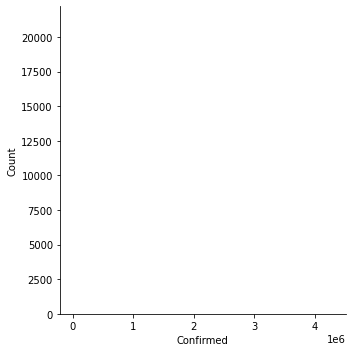

In [81]:
sns.displot(df['Confirmed'])
plt.show()

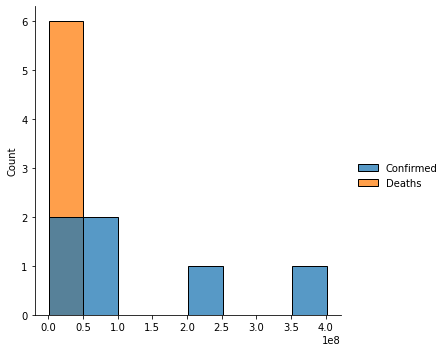

In [80]:
sns.displot(regional_stat)
plt.show()

In [72]:
# bar 
sns.countplot(
    x='regional_stat',  
    y='Confirmed',   
    kind='bar',
    col='WHO Region'
)

plt.show()

ValueError: ignored

In [59]:
sns.countplot(x='WHO Region', data=regional_stat, hue='WHO Region')

ValueError: ignored

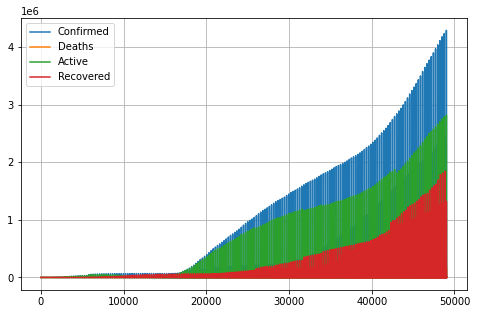

In [58]:
plt.plot(df['Confirmed'])
plt.plot(df['Deaths'])
plt.plot(df['Active'])
plt.plot(df['Recovered'])
plt.grid()
plt.legend(['Confirmed','Deaths','Active','Recovered'])
plt.show()

# 5.  피벗테이블 사용
    * 나라별 코로나 확진자의 사망자율/회복률을 지역별로 조회하기 위해 
    * 행 인덱스: 나라별
    * 열 인덱스: WHO 지역 #새로운 column 명이 됨
    * 집계할값 대상: 사망자 수

In [20]:
import numpy as np
pd.pivot_table(
    df, #사용할 데이터 프레임
    index=["Country/Region"],  #나라별로 보고 싶어서 선택한 인덱스
    columns="WHO Region",  #규모구분의 값인 WHO Region 컬럼명이 됨
    values="Deaths") #사망자 수 

WHO Region,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
Country/Region,,,,,,
Afghanistan,NaN,NaN,261.159574,NaN,NaN,NaN
Albania,NaN,NaN,NaN,30.361702,NaN,NaN
Algeria,414.744681,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,28.845745,NaN,NaN
Angola,5.734043,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,7.287234,NaN,NaN,NaN
Western Sahara,0.335106,NaN,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,94.186170,NaN,NaN,NaN


컬럼과 인덱스를 바꿔서 보니 더 보기 편하다

In [15]:
import numpy as np
pd.pivot_table(
    df, #사용할 데이터 프레임
    index="WHO Region", 
    columns="Country/Region", 
    values="Deaths")  #  사망자수

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
WHO Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,NaN,NaN,414.744681,NaN,5.734043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.824468,NaN,NaN,NaN,0.638298,NaN,NaN,NaN,29.696809,NaN,0.56383,4.542553,NaN,118.904255,NaN,10.691489,29.37766,NaN,NaN,NaN,1.792553,14.340426,...,NaN,0.0,22.265957,NaN,NaN,NaN,NaN,967.973404,NaN,10.670213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.558511,NaN,NaN,6.888298,NaN,NaN,NaN,NaN,0.031915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.335106,NaN,14.058511,4.68617
Americas,NaN,NaN,NaN,NaN,NaN,1.734043,519.941489,NaN,NaN,NaN,NaN,6.398936,NaN,NaN,3.925532,NaN,NaN,1.180851,NaN,NaN,415.06383,NaN,NaN,20946.989362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.091312,NaN,NaN,1715.319149,NaN,1258.111702,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.835106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.047872,NaN,NaN,58571.335106,NaN,NaN,NaN,NaN,13.06383,NaN,21.81383,NaN,NaN,NaN,NaN,NaN,NaN
Eastern Mediterranean,261.159574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.207447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,37.265957,NaN,NaN,NaN,NaN,NaN,188.37766,NaN,NaN,NaN,5.175532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.925532,NaN,NaN,NaN,NaN,135.037234,NaN,NaN,NaN,NaN,NaN,7.287234,NaN,94.18617,NaN,NaN
Europe,NaN,30.361702,NaN,28.845745,NaN,NaN,NaN,144.090426,NaN,379.734043,75.968085,NaN,NaN,NaN,NaN,151.015957,5125.952128,NaN,NaN,NaN,NaN,87.090426,NaN,NaN,NaN,93.904255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153.595745,NaN,NaN,NaN,14.319149,60.244681,NaN,NaN,NaN,NaN,16133.138298,NaN,NaN,NaN,2387.835106,1105.62766,NaN,NaN,20.824468,NaN,NaN,NaN,NaN,NaN,NaN,2479.021277,NaN,NaN,453.446809,NaN,1933.160058,NaN,15.62766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
South-East Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,615.069149,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.398936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.87766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.452128,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Western Pacific,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.571144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.202128,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,108.383785,NaN,NaN,NaN,...,NaN,NaN,NaN,12.984043,NaN,NaN,NaN,NaN,178.287234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.468085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [295]:
# df.loc[df['Confirmed']and['Deaths']==0]

In [296]:
df.groupby(["WHO Region","Country/Region"])["Confirmed","Deaths"].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Confirmed  Deaths
WHO Region      Country/Region                   
Africa          Algeria           1179755   77972
                Angola              22662    1078
                Benin               64406    1095
                Botswana            15306     120
                Burkina Faso        96153    5583
...                                   ...     ...
Western Pacific Philippines       2972611  110892
                Singapore         3502472    2441
                South Korea       1647537   33518
                Taiwan*             55593     840
                Vietnam             40675       0

[187 rows x 2 columns]

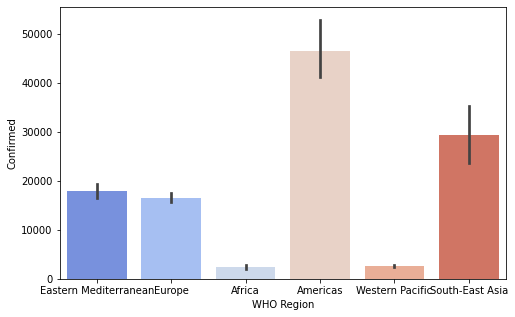

In [85]:
sns.barplot(x='WHO Region', y='Confirmed', data=df, palette='coolwarm')

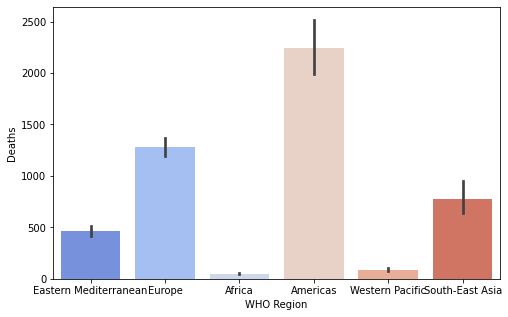

In [86]:
sns.barplot(x='WHO Region', y='Deaths', data=df, palette='coolwarm')

# Numpy 집계 함수 활용



In [297]:
# Survival_Rate = Regions_Deaths/Region_Confirmed
# Survival_Rate

In [298]:
import numpy as np
pd.pivot_table(
    df, #사용할 데이터 프레임
    index="Country/Region",
    columns="WHO Region",
    values="Deaths")

WHO Region,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Western Pacific
Country/Region,,,,,,
Afghanistan,NaN,NaN,261.159574,NaN,NaN,NaN
Albania,NaN,NaN,NaN,30.361702,NaN,NaN
Algeria,414.744681,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,28.845745,NaN,NaN
Angola,5.734043,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
West Bank and Gaza,NaN,NaN,7.287234,NaN,NaN,NaN
Western Sahara,0.335106,NaN,NaN,NaN,NaN,NaN
Yemen,NaN,NaN,94.186170,NaN,NaN,NaN


#  6.시각화

Heatmap을 이용한 상관관계 조사

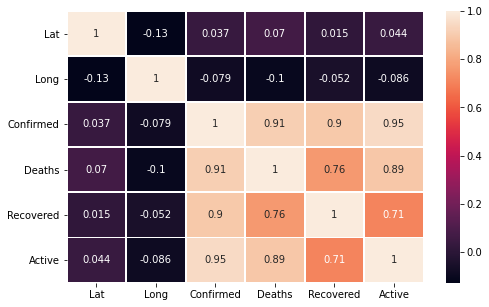

In [25]:
plt.rcParams["figure.figsize"] =(8, 5)
sns.heatmap(df.corr(), annot=True, linewidths=1)
plt.show()

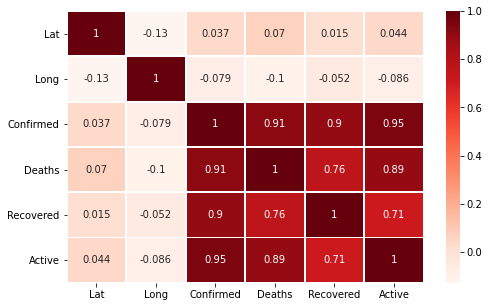

In [26]:
plt.rcParams["figure.figsize"] =(8, 5)
sns.heatmap(df.corr(), annot=True, linewidths=1, cmap="Reds")
plt.show()

In [ ]:
pivot = df.pivot_table(index='Country/Region', columns="WHO Region", values='Deaths')
pivot

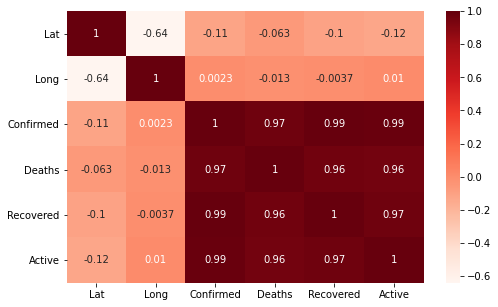

In [29]:
sns.heatmap(df_Africa.corr(), cmap ='Reds', annot=True)
plt.show()

ValueError: ignored

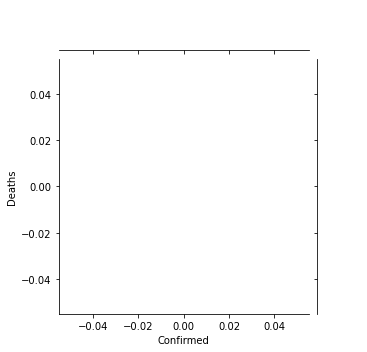

In [38]:
sns.jointplot(x='Confirmed', y='Deaths', height=5, data=df, kind='kde', color='g')

In [ ]:
sns.pairplot(df_Africa)
plt.show()

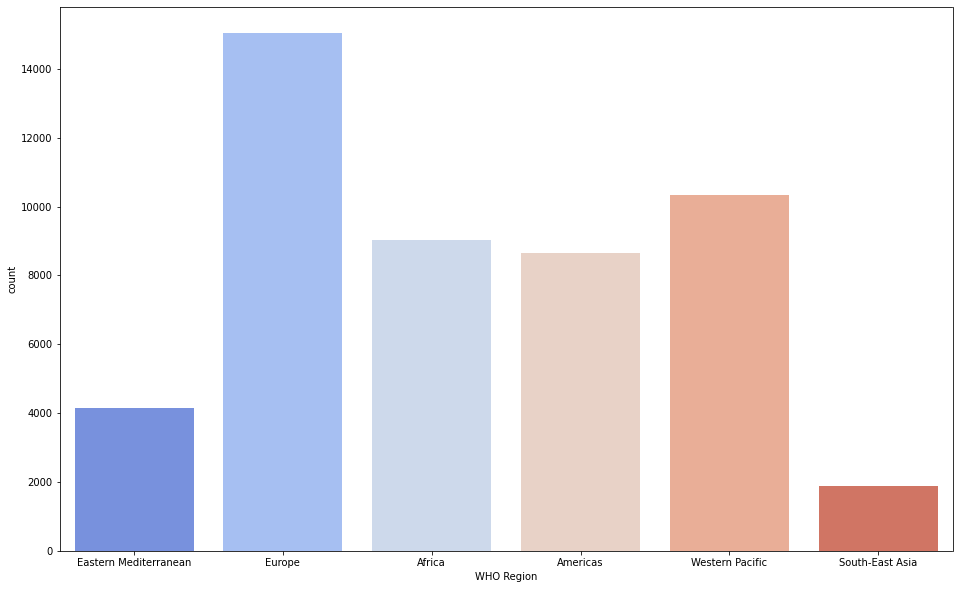

In [327]:
sns.countplot(x='WHO Region', data=df, palette="coolwarm")
plt.show()

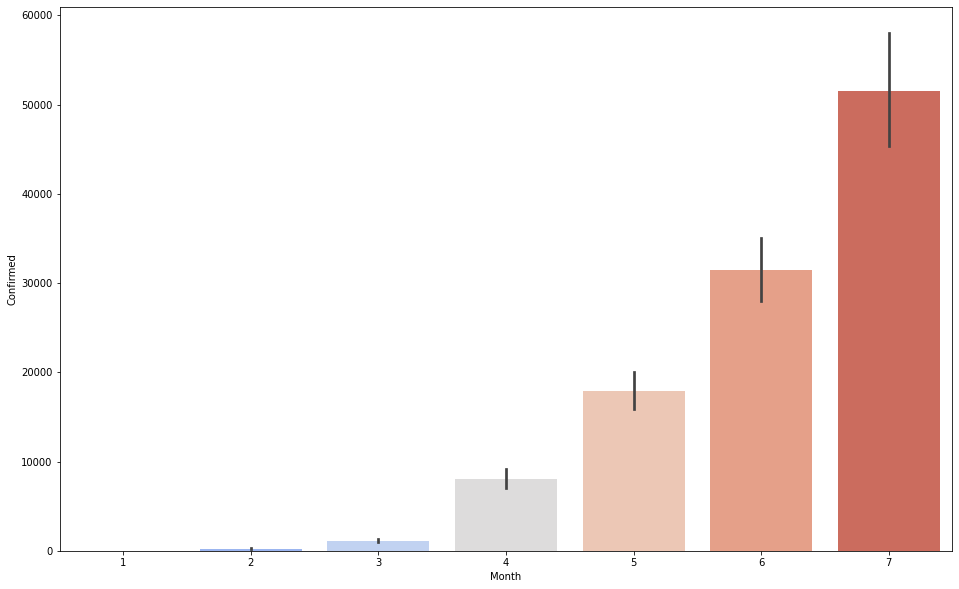

In [326]:
sns.barplot(x='Month', y='Confirmed', data=df, palette="coolwarm")
plt.show()

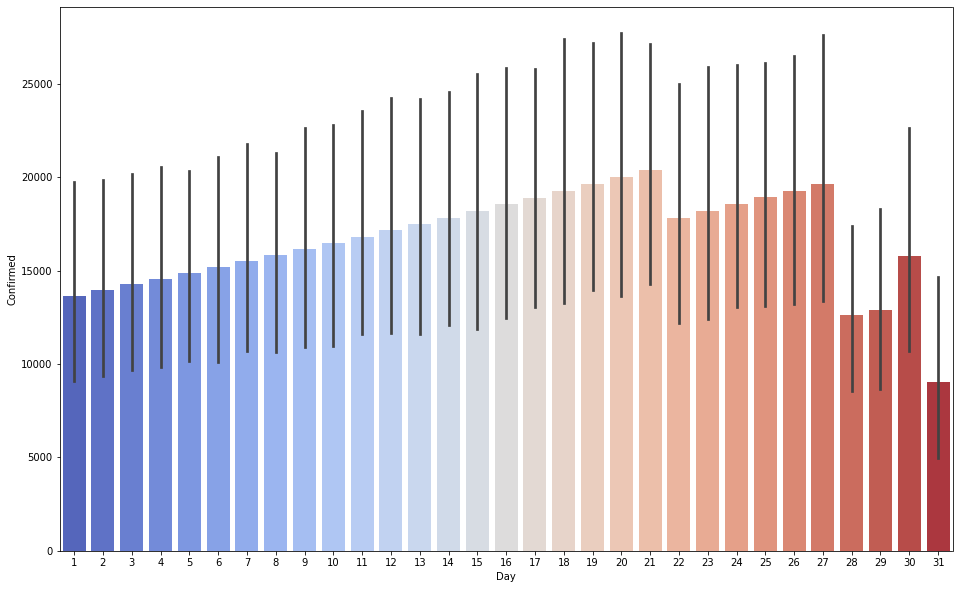

In [323]:
sns.barplot(x='Day', y='Confirmed', data=df, palette="coolwarm")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


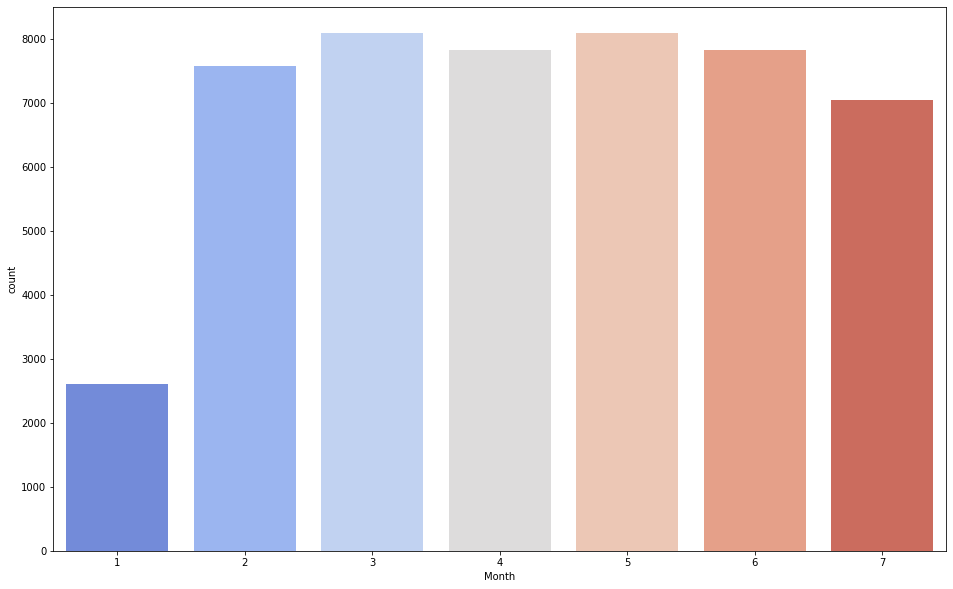

In [311]:
sns.countplot(df['Month'], palette="coolwarm")
plt.show()

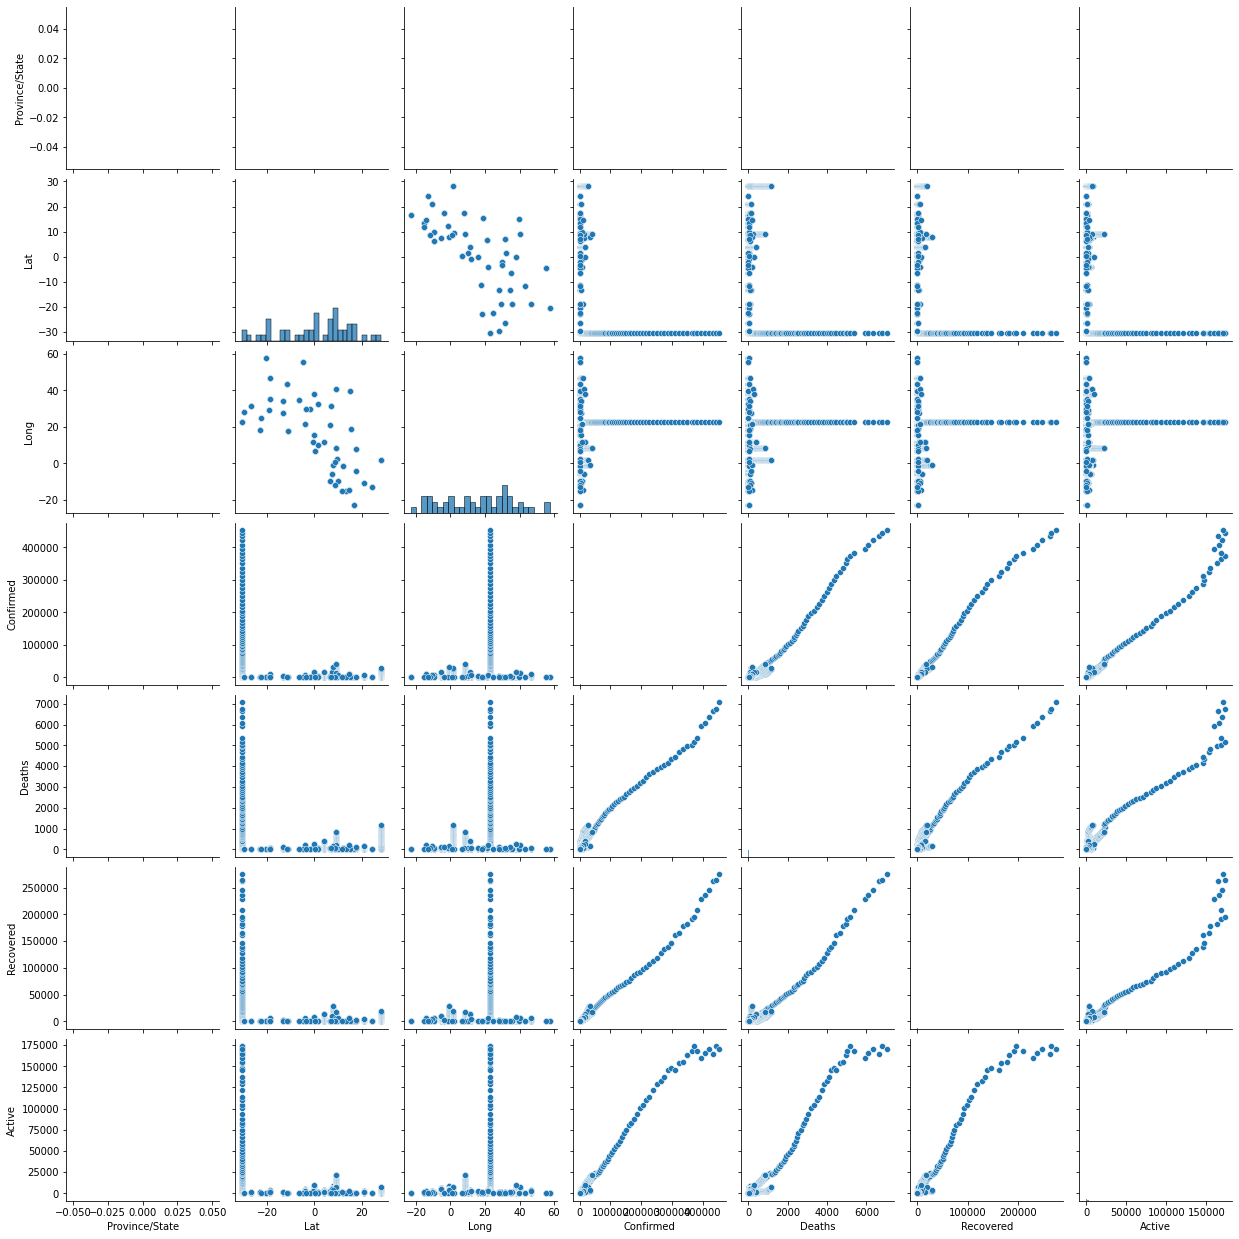

In [37]:
sns.pairplot(df_Africa)

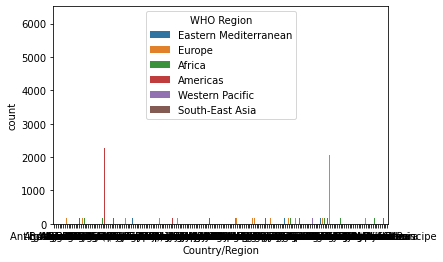

In [6]:
sns.countplot(
    x= 'Country/Region',
    data= df,
    hue='WHO Region'
)

plt.show()

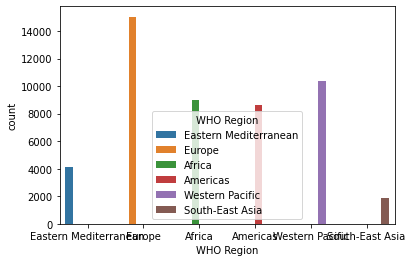

In [8]:
sns.countplot(
    x= 'WHO Region',
    data= df,
    hue='WHO Region'
)

plt.show()

In [ ]:
sns.countplot(x='WHO Rregion', data=df)
plt.show()

In [ ]:
Region_Confirmed.plot(kind='barh')

In [ ]:
df['WHO Region'].unique()

In [21]:
df_Africa = df.loc[df['WHO Region'] == 'Africa']
df_Africa.head(100)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0,Africa
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0,Africa
24,NaN,Benin,9.3077,2.3158,2020-01-22,0,0,0,0,Africa
31,NaN,Burkina Faso,12.2383,-1.5616,2020-01-22,0,0,0,0,Africa
32,NaN,Cabo Verde,16.5388,-23.0418,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
521,NaN,Lesotho,-29.6100,28.2336,2020-01-23,0,0,0,0,Africa
524,NaN,Algeria,28.0339,1.6596,2020-01-24,0,0,0,0,Africa
526,NaN,Angola,-11.2027,17.8739,2020-01-24,0,0,0,0,Africa
546,NaN,Benin,9.3077,2.3158,2020-01-24,0,0,0,0,Africa


In [36]:
df_Africa = df.loc[df['WHO Region','Confirmed'] == ['Africa']
df_Africa.head()

# plt.rcParams["figure.figsize"] = (12, 30)
# df_Africa.plot(kind='barh')

SyntaxError: ignored

In [ ]:
df_Africa = df.loc[df['WHO Region','Confirmed'] == ['Africa']
df_Africa.head(100)


# 가설 확인 
지역별 생존률 컬럼을 어떻게 추가하나?